In [ ]:
##################################################################
# This code shows a scratch CNN model tested as initial trial.
##################################################################
#################################
# import modules
#################################
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import torchvision.transforms as tr
import pandas as pd

In [ ]:
#################################
# load train samples from npy file
#################################
X_train=np.load("X_train.npy", mmap_mode='r') 
y_train=np.load("y_train.npy", mmap_mode='r')

In [ ]:
#################################
# reduce sample size
#################################
resize = []
for i in range(858):
    x_resize = cv2.resize(X_train[i],(256,256))
    resize.append(x_resize)

In [ ]:
x_resize = np.array(resize)

In [ ]:
#################################
# make a dataloader
#################################
class TensorData(Dataset):
    
    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.x_data = self.x_data.permute(0,3,1,2) # img, channel, width, height
        self.y_data = torch.LongTensor(y_data)
        self.len = self.y_data.shape[0]
    
    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]
    
    def __len__(self):
        return self.len

In [ ]:
train_data = TensorData(resize, y_train)

In [ ]:
train_loader = DataLoader(train_data, batch_size = 300, shuffle = True)

In [ ]:
len(train_loader) #we have 858 images and batch size is 300. So we got 3

3

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [ ]:
images.size() #we have 100 images

torch.Size([300, 256, 256, 3])

In [ ]:
#################################
# set the random seed for reproduction
#################################
np.random.seed(1)

In [ ]:
#################################
# randomly extract 30 imgs from 100 imgs
#################################
index_list = np.arange(0,len(images))
valid_index = np.random.choice(index_list, size = 100, replace = False)

In [ ]:
valid_images = images[valid_index] #30x3x1024x1024
valid_labels = labels[valid_index]

In [ ]:
train_index = set(index_list)-set(valid_index)
train_images = images[list(train_index)]
train_lables = labels[list(train_index)]

In [ ]:
train_lables

tensor([0, 2, 1, 3, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0,
        0, 0, 1, 1, 2, 0, 1, 3, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2,
        2, 0, 2, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 3, 3, 0, 2,
        1, 2, 0, 1, 0, 1, 3, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 3, 0, 1, 1,
        0, 2, 2, 1, 0, 3, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 3, 0, 0, 1, 0,
        0, 3, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        1, 3, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 3, 0,
        2, 0, 2, 0, 0, 1, 0, 0])

In [ ]:
 valid_labels

tensor([0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
        0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2,
        2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 3, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 3, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 3,
        0, 2, 0, 0])

In [ ]:
train_images.size()

torch.Size([200, 256, 256, 3])

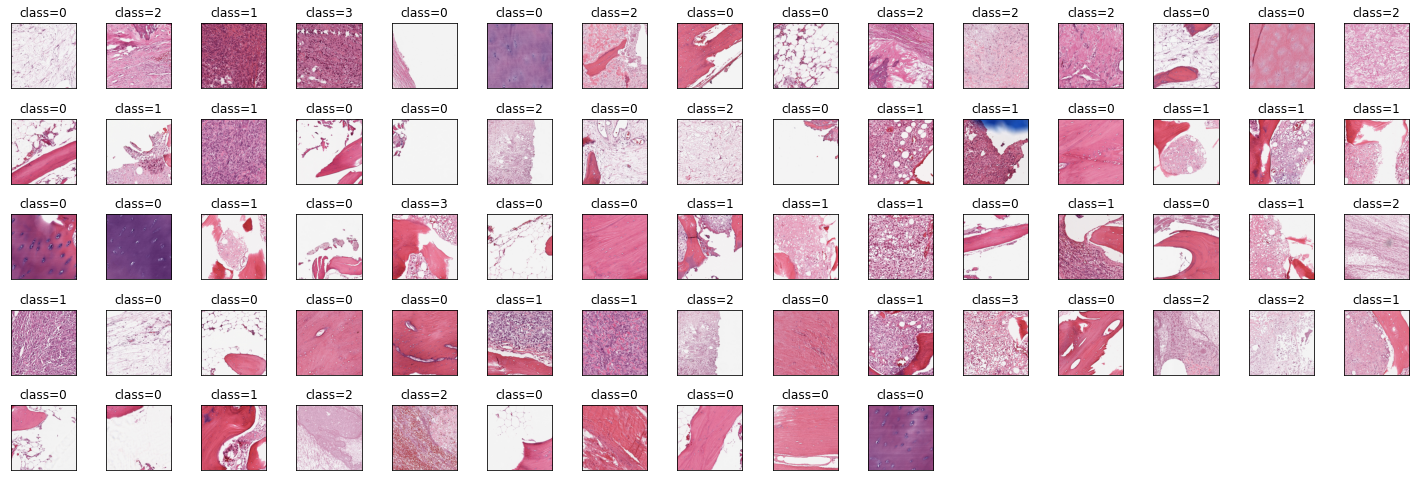

In [ ]:
#################################
# print the images to check
#################################

plt.figure(figsize=(20,20))
for i in range(70):
    plt.subplot(15,15,i+1)
    plt.imshow(train_images[i]) 
    plt.title(f'class={int(train_lables[i])}') 
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
#################################
# import modules
#################################
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, TensorBoard

In [ ]:
#################################
# prepare the train x and y samples
#################################
x_train = train_images.numpy()
y_train = train_lables.numpy()

x_valid = valid_images.numpy()
y_valid = valid_labels.numpy()

In [ ]:
#################################
# model preparation
#################################
model = tf.keras.Sequential()
model.add(Conv2D(6, kernel_size=(3,3), activation = 'relu', padding='same', input_shape = (256,256,3)))
model.add(Conv2D(16, kernel_size=(3,3), activation = 'relu', padding='same', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 6)       168       
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0         
                                                                 
 dense_2 (Dense)             (None, 100)               26214500  
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                      

In [ ]:
#################################
# compile the model
#################################
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy']  
             )

In [ ]:
call_backs = [
    EarlyStopping(patience=3, monitor='val_loss'),
    TensorBoard(log_dir='./logs',histogram_freq=1)
]

In [ ]:
#################################
# train the model
#################################
model_fit = model.fit(x_train, y_train,
                      batch_size = 40, 
                      epochs = 30,
                      validation_data = (x_valid, y_valid),
                      callbacks=call_backs
)

Epoch 1/30
5/5 [==============================] - 11s 2s/step - loss: 2.7889 - accuracy: 0.3300 - val_loss: 1.1696 - val_accuracy: 0.5900
Epoch 2/30
5/5 [==============================] - 8s 2s/step - loss: 1.2095 - accuracy: 0.5100 - val_loss: 1.2808 - val_accuracy: 0.5100
Epoch 3/30
5/5 [==============================] - 7s 1s/step - loss: 1.3849 - accuracy: 0.4150 - val_loss: 1.1552 - val_accuracy: 0.5100
Epoch 4/30
5/5 [==============================] - 7s 2s/step - loss: 1.5275 - accuracy: 0.4150 - val_loss: 1.2806 - val_accuracy: 0.6200
Epoch 5/30
5/5 [==============================] - 7s 1s/step - loss: 1.3503 - accuracy: 0.5200 - val_loss: 1.3430 - val_accuracy: 0.2500
Epoch 6/30
5/5 [==============================] - 7s 2s/step - loss: 1.3003 - accuracy: 0.5050 - val_loss: 1.2647 - val_accuracy: 0.5000


In [ ]:
#################################
# see the result on Tensorboard
#################################
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 40970), started 4:35:51 ago. (Use '!kill 40970' to kill it.)

In [ ]:
#################################
# get the prediction from trained model
#################################
prediction = model.predict(x_valid)

In [ ]:
predictions = []
for i in range(len(prediction)):
    predictions.append(np.argmax(prediction[i]))

predictions = np.array(predictions)

In [ ]:
#################################
# check the final result in form of dataframe
#################################
df = pd.DataFrame({'y_predic':predictions, 'y_true':y_valid})
df

,y_predic,y_true
0,0,0
1,0,0
2,1,0
3,1,2
4,1,1
...,...,...
95,1,3
96,0,0
97,1,2
98,1,0
